In [1]:
from glob import glob
import numpy as np
import scipy as sp
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

os.chdir("../")

from src.detectors import gcc_phat_detector
from src.tdoa_matrix_to_tdoa_vector import tdoa_matrix_to_tdoa_vector

In [2]:
dataset_name = "tdoa_20201016"
experiment_name = "music_0010"

dataset_folder = "./data/" + dataset_name + "/data/"


# experiment_ensemble_folder = "./data/LuViRA_sound/audio_packaged_with_gt/"
# experiment_name = "music3"


# Paths -----------------------
# Given relative to base of direcotry
input_folder = "./data/" + dataset_name + "/data/" + experiment_name + "/"
output_folder = "./results/" + dataset_name + "/data/" + experiment_name + "/"

# create output folder if it doesn't exist
Path(output_folder).mkdir(parents=True, exist_ok=True)


gcc_phat_detector(input_folder, output_folder=output_folder,
                  window_length=10000, speed_of_movement=1)
detections = np.load(output_folder + "detections.npy")
n_detection_windows = detections.shape[0]
n_mics = detections.shape[1]
tdoa_matrix_to_tdoa_vector(
    output_folder, output_folder=output_folder, cutoff_fraction_of_all_measuremnets=1/2)
tdoav = np.load(output_folder + "tdoa_vectors.npy")
df = pd.DataFrame(tdoav)
df.to_csv(output_folder + "tdoa_vectors_to_matlab.csv")


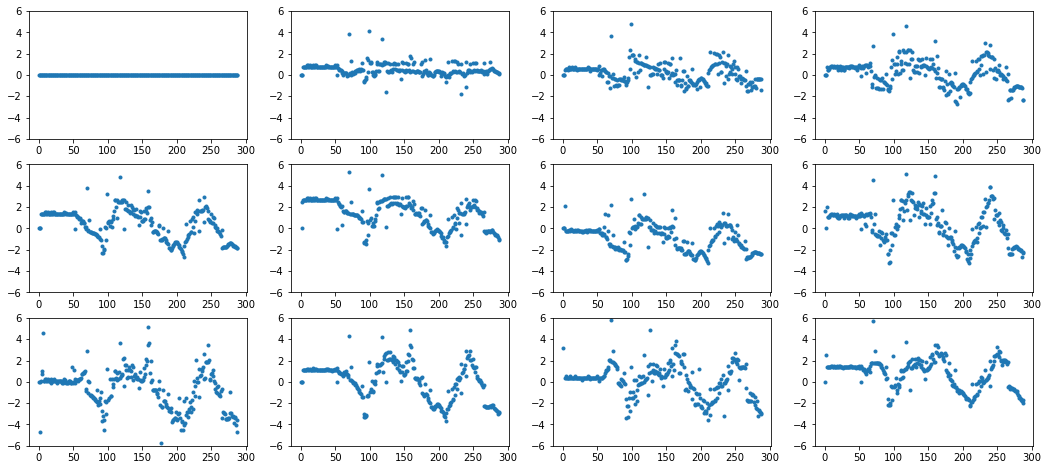

In [3]:
# Example plot
plt.subplots(nrows=3, ncols=4, figsize=(18, 8))

for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.plot(tdoav[:, i], '.')
    plt.ylim([-6, 6])
